In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("my name is Anuj ")
pf =pd.read_csv("E:/Design/Programming/Python/project 1st on data from spotify/Spotify Most Streamed Songs.csv")
#print(pf)
pf.head()

print()
pf.info()
print(pf.isnull().sum())
pf.duplicated().sum()

print()

#data containing null value
#print(pf["in_shazam_charts"])
#print(pf["keys"])
# "in_shazam_charts" data is object and also "in_deezer_playlists" is object
pf["in_shazam_charts"] = pf["in_shazam_charts"].replace(np.nan, 0)
print(pf["in_shazam_charts"].isnull().sum())
print(pf["in_shazam_charts"].dtype)

pf["in_shazam_charts"] = pd.to_numeric(pf["in_shazam_charts"], errors = 'coerce')
pf["in_shazam_charts"] = pf["in_shazam_charts"].replace(np.nan, 0)

pf["in_shazam_charts"] = pf["in_shazam_charts"].astype(int)
print(pf["in_shazam_charts"].dtype)

print(pf["in_deezer_playlists"].dtype)
pf["in_deezer_playlists"] = pd.to_numeric(pf["in_deezer_playlists"], errors = 'coerce')
pf["in_deezer_playlists"] = pf["in_deezer_playlists"].replace(np.nan, 0)
pf["in_deezer_playlists"] = pf["in_deezer_playlists"].astype(int)
print(pf["in_deezer_playlists"].dtype)
pf.info()


print("till now data is in int form ")

print()

# removing column
pf.pop('key')
pf.pop('cover_url')

k =pf.isnull().sum()
print(k)
print()


my name is Anuj 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
track_name              953 non-null object
artist(s)_name          953 non-null object
artist_count            953 non-null int64
released_year           953 non-null int64
released_month          953 non-null int64
released_day            953 non-null int64
in_spotify_playlists    953 non-null int64
in_spotify_charts       953 non-null int64
streams                 953 non-null object
in_apple_playlists      953 non-null int64
in_apple_charts         953 non-null int64
in_deezer_playlists     953 non-null object
in_deezer_charts        953 non-null int64
in_shazam_charts        903 non-null object
bpm                     953 non-null int64
key                     858 non-null object
mode                    953 non-null object
danceability_%          953 non-null int64
valence_%               953 non-null int64
energy_%                953 non-null int64
acousticne

In [246]:
pf.info()
k =pf.isnull().sum()
print(k)
print()
pf['in_shazam_charts'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
track_name              953 non-null object
artist(s)_name          953 non-null object
artist_count            953 non-null int64
released_year           953 non-null int64
released_month          953 non-null int64
released_day            953 non-null int64
in_spotify_playlists    953 non-null int64
in_spotify_charts       953 non-null int64
streams                 953 non-null object
in_apple_playlists      953 non-null int64
in_apple_charts         953 non-null int64
in_deezer_playlists     953 non-null int32
in_deezer_charts        953 non-null int64
in_shazam_charts        953 non-null int32
bpm                     953 non-null int64
mode                    953 non-null object
danceability_%          953 non-null int64
valence_%               953 non-null int64
energy_%                953 non-null int64
acousticness_%          953 non-null int64
instrumentalness_%      953 non

count    953.000000
mean      48.115425
std      123.242346
min        0.000000
25%        0.000000
50%        2.000000
75%       32.000000
max      953.000000
Name: in_shazam_charts, dtype: float64

In [247]:
pf.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

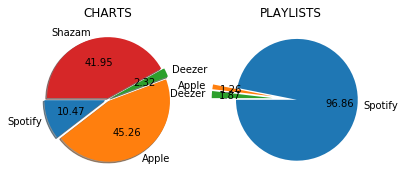

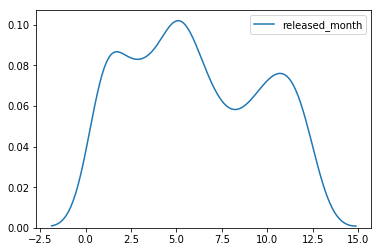

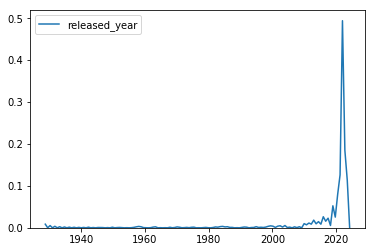

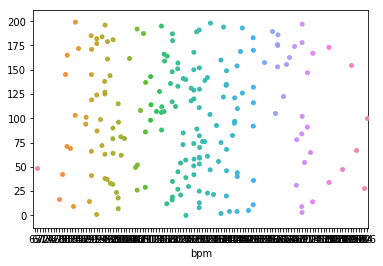

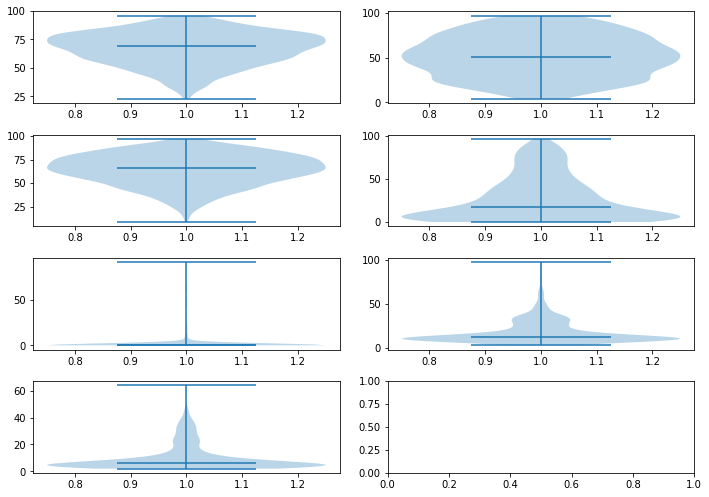

In [364]:
#Eplonatory Data Analysis
# pie chart on the basis of playlist then charts
#sns.catplot(data = pf , x = pf['in_spotify_charts'],y = pf['in_apple_charts'], kind ="strip")
l = pf["in_spotify_charts"].sum()
m = pf["in_apple_charts"].sum()
n = pf["in_deezer_charts"].sum()
o = pf["in_shazam_charts"].sum()
p = pf["in_spotify_playlists"].sum()
q = pf["in_apple_playlists"].sum()
r = pf["in_deezer_playlists"].sum()

s = [l,m,n,o]
names=['Spotify','Apple','Deezer','Shazam']
ex = [0.05,0.03,0.05,0.02]


# plot 1
plt.subplot(1,2,1)
plt.pie(s, labels = names, explode = ex, shadow = True, autopct ='%.2f', startangle = 180,)
plt.title('CHARTS')


# plot 2
t = [p,q,r]
names2 =['Spotify','Apple','Deezer']
ex2 = [0.1,0.3,0.3]
plt.subplot(1,2,2)
plt.pie(t, labels = names2, explode = ex2, shadow = False, autopct ='%.2f', startangle = 180, pctdistance = 0.7)
plt.title('PLAYLISTS')
plt.show()

## now comparing within years
sns.kdeplot(data = pf["released_month"])
plt.show()
sns.kdeplot(data = pf["released_year"])
plt.show()

# bpm vs %
group_by = pf["bpm"]
sns.stripplot(data = pf, x = group_by,y = range(0,200) , dodge = True)
plt.show()

# analyzing data which is in %

fig, ax = plt.subplots(4, 2, figsize=(10,7))
fig.tight_layout()

ax[0,0].violinplot(pf['danceability_%'],showmedians = True)
ax[0,1].violinplot(pf['valence_%'],showmedians = True)
ax[1,0].violinplot(pf['energy_%'],showmedians = True)
ax[1,1].violinplot(pf['acousticness_%'],showmedians = True)
ax[2,0].violinplot(pf['instrumentalness_%'],showmedians = True)
ax[2,1].violinplot(pf['liveness_%'],showmedians = True)
ax[3,0].violinplot(pf['speechiness_%'],showmedians = True)


plt.show()


